# Priprava na analyzu genomu *Takifugu rubripes*

Nacitanie potrebnych modulov:

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pylab as pl
import re

Rozdelenie .gtf suboru na geny a transkripty:

In [3]:
!cat Takifugu_rubripes.FUGU4.86.gtf | grep -E "\s+gene\s+" > Takifugu_rubripes.FUGU4.86_gene.gtf

In [4]:
!cat Takifugu_rubripes.FUGU4.86.gtf | grep -E "\s+transcript\s+" > Takifugu_rubripes.FUGU4.86_transcript.gtf

Uprava dat podla vzoroveho protokolu:

In [5]:
genes=pd.read_table('Takifugu_rubripes.FUGU4.86_gene.gtf', header=None, dtype={0:np.object})   
transcripts=pd.read_table('Takifugu_rubripes.FUGU4.86_transcript.gtf', header=None, dtype={0:np.object})

In [6]:
genes.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]
transcripts.columns = ["seqname", "source", "feature", "start", "end", "score", "strand", "frame", "attribute"]

In [7]:
def parse_attributes(attributes_str):
    ONLY_ATTRIBUTES = set(["gene_id", 
                          "transcript_id",
                          "gene_name",
                          "gene_biotype",
                          "transcript_name",
                          "transcript_biotype"])
    out = {}
    
    for pair in attributes_str.split(";"):
        if pair.strip() == "":
            continue
        m = re.match(r"^\s*(.+) \"(.+)\"$", pair)
        
        if m.group(1) in ONLY_ATTRIBUTES:
            out[m.group(1)] = m.group(2)

    return out

In [8]:
def split_attribute_column(df):
    attributes_columns = df.attribute.apply(parse_attributes).apply(pd.Series)
    return pd.concat([df.drop(["attribute"], axis=1),
                      attributes_columns],
                     axis=1)

genes = split_attribute_column(genes)
transcripts = split_attribute_column(transcripts)

In [9]:
transcripts.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name,transcript_biotype,transcript_id,transcript_name
0,scaffold_1,ensembl,transcript,10422,11354,.,-,.,protein_coding,ENSTRUG00000003702,foxb1b,protein_coding,ENSTRUT00000008740,foxb1b-201
1,scaffold_1,ensembl,transcript,20130,22355,.,+,.,protein_coding,ENSTRUG00000003740,gtf2a2,protein_coding,ENSTRUT00000008836,gtf2a2-201
2,scaffold_1,ensembl,transcript,23125,25457,.,-,.,protein_coding,ENSTRUG00000003845,znf395a,protein_coding,ENSTRUT00000009117,znf395a-201
3,scaffold_1,ensembl,transcript,23125,25221,.,-,.,protein_coding,ENSTRUG00000003845,znf395a,protein_coding,ENSTRUT00000009118,znf395a-202
4,scaffold_1,ensembl,transcript,23125,25221,.,-,.,protein_coding,ENSTRUG00000003845,znf395a,protein_coding,ENSTRUT00000009119,znf395a-203


In [10]:
genes.head()

,seqname,source,feature,start,end,score,strand,frame,gene_biotype,gene_id,gene_name
0,scaffold_1,ensembl,gene,10422,11354,.,-,.,protein_coding,ENSTRUG00000003702,foxb1b
1,scaffold_1,ensembl,gene,20130,22355,.,+,.,protein_coding,ENSTRUG00000003740,gtf2a2
2,scaffold_1,ensembl,gene,23125,25457,.,-,.,protein_coding,ENSTRUG00000003845,znf395a
3,scaffold_1,ensembl,gene,30970,33491,.,-,.,protein_coding,ENSTRUG00000004024,PAQR8 (1 of many)
4,scaffold_1,ensembl,gene,40384,41519,.,-,.,protein_coding,ENSTRUG00000004274,stmn4l


# 
#
#

# Analyza genomu *Takifugu rubripes*

![Takifugu](http://2.bp.blogspot.com/-vIYDBTjolQE/TZmsnovmyAI/AAAAAAAAFz4/d_MkNWmoqNQ/s1600/takifugu.jpg)

- znama tiez ako fugu
- jedovata (tetrodotoxin)
- patri k japonskym delikatesam


- genom publikovany v 2002
- druhy osekvenovany obratlovec (1. clovek)
- velmi maly genom 
    - 392 Mb vs. clovek 3 234 Mb
    - 12% velkosti ludskeho genomu

### - pocet "chromozomov":

In [11]:
genes["seqname"].describe()

count          19388
unique          2056
top       scaffold_1
freq             372
Name: seqname, dtype: object

- 2056 scaffoldov
    - *(genomy su assemblovane hierarchicky: contig < scaffold < chromosome)*

In [12]:
! cut -f1 "Takifugu_rubripes.FUGU4.86_gene.gtf" | uniq | grep "scaffold" | wc -l

2055


 - jeden unikatny "seqname" neobsahuje slovo scaffold

In [13]:
! cut -f1 "Takifugu_rubripes.FUGU4.86_gene.gtf" | uniq | grep -v "scaffold"

MT


- geny su priradene bud k scaffoldom (chromozomalne/jadrove) alebo k mitochondrialnemu genomu

In [66]:
genes["seqname"].value_counts().head()

scaffold_1    372
scaffold_3    295
scaffold_2    261
scaffold_6    226
scaffold_7    184
Name: seqname, dtype: int64

- najcastejsie scaffoldy: 1, 3, 2, 6, 7

### - pocet genov:

In [14]:
genes["gene_id"].describe()

count                  19388
unique                 19388
top       ENSTRUG00000006188
freq                       1
Name: gene_id, dtype: object

- napriek malej velkosti genomu podobny pocet genov ako clovek
    - 19388 genov vs. 20441
    - 95% poctu ludskych genov
    

In [70]:
genes["gene_biotype"].value_counts()

protein_coding    18523
miRNA               337
snoRNA              175
pseudogene          162
rRNA                 83
snRNA                74
Mt_tRNA              22
misc_RNA             10
Mt_rRNA               2
Name: gene_biotype, dtype: int64

In [133]:
genes.loc[genes["gene_biotype"] != "protein_coding"]["gene_id"].count()

865

- najcastejsie geny: protein kodujuce (18523), miRNA (337) a snoRNA (175)
- 865 nekodujucich genov

#### - pocet mitochondrialnych genov:

In [15]:
genes.loc[genes["seqname"] == "MT"].count()["gene_id"]

37

- obsahuje 37 genov kodujucich mitochondrialnym genomom, podobne ako clovek

In [69]:
genes.loc[genes["seqname"] == "MT"]["gene_biotype"].value_counts()

Mt_tRNA           22
protein_coding    13
Mt_rRNA            2
Name: gene_biotype, dtype: int64

- 22 tRNA, 2 rRNA, 13 protein kodujucich genov kodovanych mitochondrialnym genomom

### - dlzka genov:

In [16]:
genes["gene_len"] = genes["end"] - genes["start"]

In [17]:
genes["gene_len"].describe()

count     19388.000000
mean       7570.376728
std       11941.577886
min          27.000000
25%        1882.000000
50%        3898.500000
75%        8068.000000
max      255229.000000
Name: gene_len, dtype: float64

- priemerna dlzka genov 7570 nt

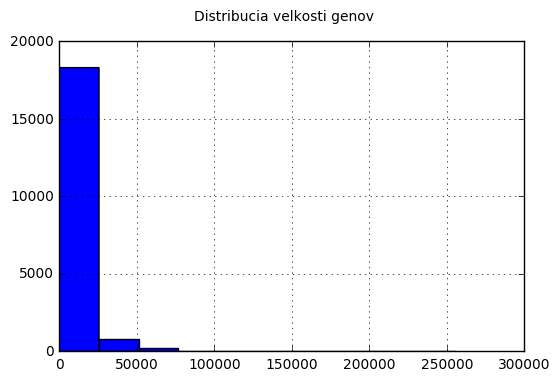

In [52]:
%matplotlib inline
pl.suptitle("Distribucia velkosti genov")
genes["gene_len"].hist(bins = 10)

#### - dlzka mitochondrialnych genov:

In [28]:
genes.loc[genes["seqname"] == "MT"].describe()["gene_len"]

count      37.000000
mean      420.324324
std       535.101032
min        63.000000
25%        69.000000
50%        72.000000
75%       690.000000
max      1838.000000
Name: gene_len, dtype: float64

- priemerna dlzka mitochondrialnych genov 535 nt

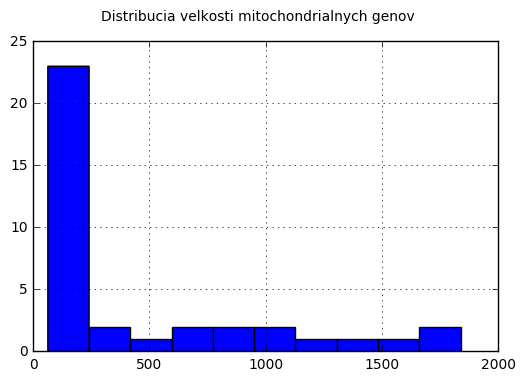

In [73]:
genes.loc[genes["seqname"] == "MT"]["gene_len"].hist(bins = 10)
pl.suptitle("Distribucia velkosti mitochondrialnych genov")

- 22 tRNA, 2 rRNA, 13 protein kodujucich genov kodovanych mitochondrialnym genomom

In [206]:
mt_genes = genes.loc[genes["seqname"] == "MT"]
mt_transcripts = transcripts.loc[transcripts["seqname"] == "MT"]

#### Distribucia velkosti mitochondrialnych genov podla ich biotypu

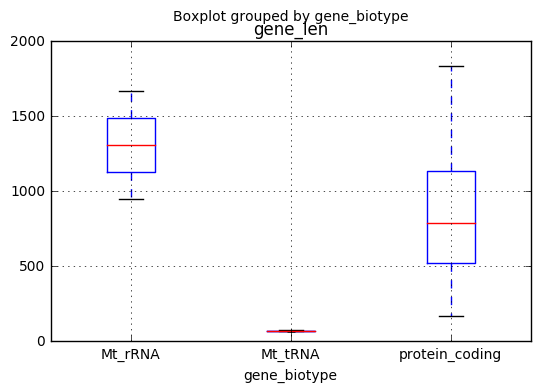

In [92]:
mt_genes.boxplot(column="gene_len", by="gene_biotype")

### - pocet transkriptov

In [121]:
transcripts["gene_id"].value_counts().describe()

count    19388.000000
mean         2.512172
std          2.071977
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         10.000000
Name: gene_id, dtype: float64

- v priemere maju geny 2,5 transkriptov
    - az 75% genov ma max 3 transkripty
    - geny maju najviac 10 transkriptov 

In [158]:
number_of_transcripts = transcripts["gene_id"].value_counts()

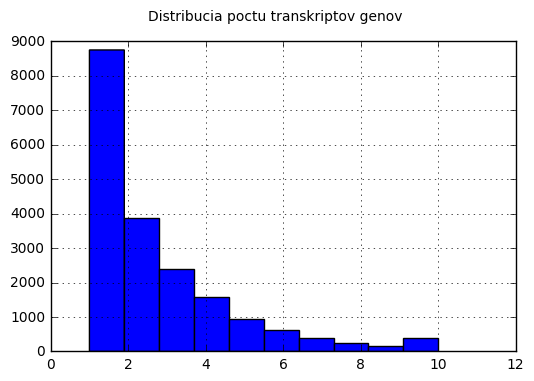

In [122]:
transcripts["gene_id"].value_counts().hist()
pl.suptitle("Distribucia poctu transkriptov genov")

In [136]:
transcripts.loc[transcripts["gene_biotype"] != "protein_coding"]["gene_id"].value_counts().describe()

count    865
mean       1
std        0
min        1
25%        1
50%        1
75%        1
max        1
Name: gene_id, dtype: float64

- vsetky geny, ktore nie su "protein coding" vytvaraju iba 1 transkript

In [123]:
transcripts.loc[transcripts["seqname"] == "MT"]["gene_id"].value_counts().describe()

count    37
mean      1
std       0
min       1
25%       1
50%       1
75%       1
max       1
Name: gene_id, dtype: float64

- vsetky mitochondrialne geny maju iba 1 transkript

## - vztah medzi velkostou genu a poctom transkriptov

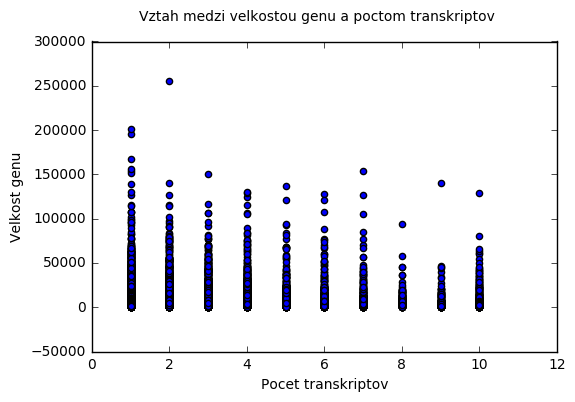

In [159]:
fig,ax = plt.pyplot.subplots()
ax.scatter(number_of_transcripts, genes["gene_len"])
ax.set_xlabel("Pocet transkriptov")
ax.set_ylabel("Velkost genu")
pl.suptitle("Vztah medzi velkostou genu a poctom transkriptov")

### ma "vyznam" to, na akom strande (+/-) su geny?

In [166]:
genes["strand"].value_counts()

+    9740
-    9648
Name: strand, dtype: int64

In [167]:
mt_genes["strand"].value_counts()

+    30
-     7
Name: strand, dtype: int64

In [205]:
transcripts["strand"].value_counts()

+    24480
-    24226
Name: strand, dtype: int64

In [207]:
mt_transcripts["strand"].value_counts()

+    30
-     7
Name: strand, dtype: int64

- kym u jadrovych genov je distribucia podobna, mitochondrialne geny su prevazne na + strande

### Par zaujimavosti

#### Ma najdlhsi gen najviac moznych (10) transkriptov?

- najprv najst ID genu s najdlhsou dlzkou

In [222]:
genes.ix[genes["gene_len"].idxmax()]["gene_id"]

'ENSTRUG00000006204'

- najst odpovedajuci gen a spocitat pocet transkriptov:

In [228]:
transcripts.loc[transcripts["gene_id"] == genes.ix[genes["gene_len"].idxmax()]["gene_id"]].count()["transcript_id"]

6

- najdlhsi gen v genome tvori "len" 6 alternativnych transkriptov